In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import fastf1 as f1
from fastf1 import plotting
from ing_theme_matplotlib import mpl_style
import mplcyberpunk

In [2]:
def convert_to_normal(time):
    if pd.isna(time):
        return time

    time_str = str(time)
    parts = time_str.split()

    days = int(parts[0])
    minutes, seconds_with_microseconds = parts[2].split(":")[1:]
    seconds, microseconds = seconds_with_microseconds.split(".")

    minutes = int(minutes)
    seconds = int(seconds)
    microseconds = int(microseconds)

    total_microseconds = (
        days * 86400000000 + minutes * 60000000 + seconds * 1000000 + microseconds
    )

    minutes, remaining_microseconds = divmod(total_microseconds, 60000000)
    seconds, microseconds = divmod(remaining_microseconds, 1000000)

    normal_time = f"{minutes:02d}:{seconds:02d}.{microseconds:06d}"
    return normal_time

*Qualifying*

In [3]:
quali = f1.get_session(2025, "Australia", "Qualifying")
quali.load()

req         WARNING 	DEFAULT CACHE ENABLED! (189.38 MB) /home/hexa/.cache/fastf1


core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.5.3]


req            INFO 	Using cached data for session_info


req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data


req            INFO 	Using cached data for track_status_data


req            INFO 	Using cached data for _extended_timing_data


req            INFO 	Using cached data for timing_app_data


core           INFO 	Processing timing data...


req            INFO 	Using cached data for car_data


req            INFO 	Using cached data for position_data


req            INFO 	Using cached data for weather_data


req            INFO 	Using cached data for race_control_messages


core           INFO 	Finished loading data for 20 drivers: ['4', '81', '1', '63', '22', '23', '16', '44', '10', '55', '6', '14', '18', '7', '5', '12', '27', '30', '31', '87']


In [4]:
quali.session_info

{'Meeting': {'Key': 1254,
  'Name': 'Australian Grand Prix',
  'OfficialName': 'FORMULA 1 LOUIS VUITTON AUSTRALIAN GRAND PRIX 2025',
  'Location': 'Melbourne',
  'Number': 1,
  'Country': {'Key': 5, 'Code': 'AUS', 'Name': 'Australia'},
  'Circuit': {'Key': 10, 'ShortName': 'Melbourne'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 9689,
 'Type': 'Qualifying',
 'Name': 'Qualifying',
 'StartDate': datetime.datetime(2025, 3, 15, 16, 0),
 'EndDate': datetime.datetime(2025, 3, 15, 17, 0),
 'GmtOffset': datetime.timedelta(seconds=39600),
 'Path': '2025/2025-03-16_Australian_Grand_Prix/2025-03-15_Qualifying/'}

In [5]:
quali.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
4,NOR,McLaren,NaN,1.0,NaT,
81,PIA,McLaren,NaN,2.0,NaT,
1,VER,Red Bull Racing,NaN,3.0,NaT,
63,RUS,Mercedes,NaN,4.0,NaT,
22,TSU,Racing Bulls,NaN,5.0,NaT,
23,ALB,Williams,NaN,6.0,NaT,
16,LEC,Ferrari,NaN,7.0,NaT,
44,HAM,Ferrari,NaN,8.0,NaT,
10,GAS,Alpine,NaN,9.0,NaT,
55,SAI,Williams,NaN,10.0,NaT,


In [6]:
quali_laps = quali.laps
quali_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:16:54.443000,NOR,4,0 days 00:01:50.421000,1.0,1.0,0 days 00:15:08.068000,NaT,0 days 00:00:48.877000,0 days 00:00:24.492000,...,True,McLaren,0 days 00:15:08.068000,2025-03-15 05:02:39.667,1,NaN,False,,False,False
1,0 days 00:18:10.446000,NOR,4,0 days 00:01:16.003000,2.0,1.0,NaT,NaT,0 days 00:00:26.383000,0 days 00:00:17.285000,...,True,McLaren,0 days 00:16:54.443000,2025-03-15 05:04:26.042,1,NaN,False,,False,True
2,0 days 00:20:12.796000,NOR,4,0 days 00:02:02.350000,3.0,1.0,NaT,0 days 00:19:55.246000,0 days 00:00:37.180000,0 days 00:00:23.115000,...,True,McLaren,0 days 00:18:10.446000,2025-03-15 05:05:42.045,1,NaN,False,,False,False
3,0 days 00:22:09.056000,NOR,4,0 days 00:01:56.260000,4.0,2.0,0 days 00:20:16.711000,NaT,0 days 00:00:52.032000,0 days 00:00:23.199000,...,False,McLaren,0 days 00:20:12.796000,2025-03-15 05:07:44.395,1,NaN,False,,False,False
4,0 days 00:23:24.968000,NOR,4,0 days 00:01:15.912000,5.0,2.0,NaT,NaT,0 days 00:00:26.463000,0 days 00:00:17.116000,...,False,McLaren,0 days 00:22:09.056000,2025-03-15 05:09:40.655,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0 days 00:27:05.233000,OCO,31,NaT,6.0,2.0,NaT,0 days 00:24:03.008000,0 days 00:00:34.779000,0 days 00:00:23.147000,...,True,Haas F1 Team,0 days 00:22:25.425000,2025-03-15 05:09:57.024,12,NaN,False,,False,False
293,0 days 00:29:15.473000,OCO,31,0 days 00:02:10.240000,7.0,3.0,0 days 00:27:12.859000,NaT,0 days 00:01:06.648000,0 days 00:00:21.854000,...,True,Haas F1 Team,0 days 00:27:05.233000,2025-03-15 05:14:36.832,1,NaN,False,,False,False
294,0 days 00:30:33.159000,OCO,31,0 days 00:01:17.686000,8.0,3.0,NaT,NaT,0 days 00:00:26.678000,0 days 00:00:17.331000,...,True,Haas F1 Team,0 days 00:29:15.473000,2025-03-15 05:16:47.072,1,NaN,True,TRACK LIMITS AT TURN 4 LAP 9,False,True
295,0 days 00:32:12.901000,OCO,31,NaT,9.0,3.0,NaT,0 days 00:32:12.901000,0 days 00:00:37.268000,0 days 00:00:20.676000,...,True,Haas F1 Team,0 days 00:30:33.159000,2025-03-15 05:18:04.758,1,NaN,False,,False,False


In [7]:
nor_quali_laps = quali.laps.pick_driver("NOR")
fastest_lap_nor_quali = nor_quali_laps.pick_fastest().LapTime
nor_quali_lap_time = nor_quali_laps["LapTime"]
nor_quali_sec1 = nor_quali_laps["Sector1Time"]
nor_quali_sec2 = nor_quali_laps["Sector2Time"]
nor_quali_sec3 = nor_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_nor_quali), "which was in Lap number" ,nor_quali_laps.pick_fastest().LapNumber)
nor_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:15.096000 which was in Lap number 19.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,0 days 00:01:50.421000,0 days 00:00:48.877000,0 days 00:00:24.492000,0 days 00:00:37.052000,240.0,171.0,310.0,53.0
1,0 days 00:01:16.003000,0 days 00:00:26.383000,0 days 00:00:17.285000,0 days 00:00:32.335000,290.0,322.0,307.0,324.0
2,0 days 00:02:02.350000,0 days 00:00:37.180000,0 days 00:00:23.115000,0 days 00:01:02.055000,227.0,236.0,NaN,272.0
3,0 days 00:01:56.260000,0 days 00:00:52.032000,0 days 00:00:23.199000,0 days 00:00:41.029000,228.0,237.0,313.0,96.0
4,0 days 00:01:15.912000,0 days 00:00:26.463000,0 days 00:00:17.116000,0 days 00:00:32.333000,290.0,326.0,308.0,328.0


In [8]:
fastest_lap_nor_quali = nor_quali_laps.pick_fastest()
tele_nor_quali = fastest_lap_nor_quali.get_telemetry().add_distance()
speed_nor_quali = tele_nor_quali.Speed
tele_nor_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,316.022677,8,11110.083923
3,316.829932,8,11130.870759
4,318.000000,8,11161.000000
5,318.000000,8,11205.690815
6,318.000000,8,11245.000000
...,...,...,...
562,310.254848,8,10944.867067
563,311.094183,8,10979.559572
564,312.000000,8,11017.000000
565,312.452262,8,11041.422137


In [9]:
ver_quali_laps = quali.laps.pick_driver("VER")
fastest_lap_ver_quali = ver_quali_laps.pick_fastest().LapTime
ver_quali_lap_time = ver_quali_laps["LapTime"]
ver_quali_sec1 = ver_quali_laps["Sector1Time"]
ver_quali_sec2 = ver_quali_laps["Sector2Time"]
ver_quali_sec3 = ver_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_quali), "which was in Lap number" ,ver_quali_laps.pick_fastest().LapNumber)
ver_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:15.481000 which was in Lap number 16.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
38,0 days 00:01:38.807000,0 days 00:00:40.011000,0 days 00:00:21.330000,0 days 00:00:37.466000,269.0,267.0,311.0,182.0
39,0 days 00:01:16.018000,0 days 00:00:26.366000,0 days 00:00:17.171000,0 days 00:00:32.481000,291.0,327.0,303.0,328.0
40,NaT,0 days 00:00:37.899000,0 days 00:00:23.269000,NaT,171.0,264.0,NaN,251.0
41,0 days 00:01:45.333000,0 days 00:00:43.250000,0 days 00:00:22.744000,0 days 00:00:39.339000,192.0,259.0,310.0,167.0
42,NaT,0 days 00:00:26.464000,0 days 00:00:17.743000,NaT,290.0,298.0,NaN,326.0


In [10]:
fastest_lap_ver_quali = ver_quali_laps.pick_fastest()
tele_ver_quali = fastest_lap_ver_quali.get_telemetry().add_distance()
speed_ver_quali = tele_ver_quali.Speed
tele_ver_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,317.475002,8,11284.425069
3,317.900000,8,11302.700000
4,319.000000,8,11350.000000
5,319.825000,8,11365.675000
6,320.000000,8,11369.000000
...,...,...,...
561,306.000000,8,10931.000000
562,309.422728,8,11002.306836
563,312.000000,8,11056.000000
564,312.278552,8,11079.816213


In [11]:
rus_quali_laps = quali.laps.pick_driver("RUS")
fastest_lap_rus_quali = rus_quali_laps.pick_fastest().LapTime
rus_quali_lap_time = rus_quali_laps["LapTime"]
rus_quali_sec1 = rus_quali_laps["Sector1Time"]
rus_quali_sec2 = rus_quali_laps["Sector2Time"]
rus_quali_sec3 = rus_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_rus_quali), "which was in Lap number" ,rus_quali_laps.pick_fastest().LapNumber)
rus_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:15.546000 which was in Lap number 20.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
55,NaT,NaT,0 days 00:00:19.626000,0 days 00:00:39.659000,265.0,307.0,306.0,104.0
56,0 days 00:01:17.210000,0 days 00:00:26.777000,0 days 00:00:17.431000,0 days 00:00:33.002000,289.0,323.0,310.0,322.0
57,NaT,0 days 00:00:35.312000,0 days 00:00:21.941000,NaT,241.0,289.0,NaN,232.0
58,0 days 00:02:00.097000,0 days 00:00:51.163000,0 days 00:00:21.857000,0 days 00:00:47.077000,240.0,258.0,310.0,102.0
59,0 days 00:01:16.295000,0 days 00:00:26.416000,0 days 00:00:17.163000,0 days 00:00:32.716000,290.0,326.0,312.0,326.0


In [12]:
fastest_lap_rus_quali = rus_quali_laps.pick_fastest()
tele_rus_quali = fastest_lap_rus_quali.get_telemetry().add_distance()
speed_rus_quali = tele_rus_quali.Speed
tele_rus_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,315.161826,8,11236.622431
3,315.713693,8,11279.668065
4,316.000000,8,11302.000000
5,317.925001,8,11326.062507
6,318.000000,8,11327.000000
...,...,...,...
565,312.000000,8,11178.000000
566,314.758334,8,11258.911127
567,315.000000,8,11266.000000
568,315.260000,8,11276.400000


In [13]:
tsu_quali_laps = quali.laps.pick_driver("TSU")
fastest_lap_tsu_quali = tsu_quali_laps.pick_fastest().LapTime
tsu_quali_lap_time = tsu_quali_laps["LapTime"]
tsu_quali_sec1 = tsu_quali_laps["Sector1Time"]
tsu_quali_sec2 = tsu_quali_laps["Sector2Time"]
tsu_quali_sec3 = tsu_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_tsu_quali), "which was in Lap number" ,tsu_quali_laps.pick_fastest().LapNumber)
tsu_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:15.670000 which was in Lap number 17.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
75,0 days 00:02:03.776000,0 days 00:00:59.055000,0 days 00:00:22.070000,0 days 00:00:42.651000,213.0,283.0,309.0,107.0
76,0 days 00:01:16.752000,0 days 00:00:26.690000,0 days 00:00:17.234000,0 days 00:00:32.828000,289.0,328.0,309.0,327.0
77,NaT,0 days 00:00:36.441000,0 days 00:00:20.573000,NaT,175.0,256.0,NaN,241.0
78,0 days 00:01:55.483000,0 days 00:00:52.314000,0 days 00:00:22.091000,0 days 00:00:41.078000,209.0,289.0,309.0,89.0
79,0 days 00:01:16.225000,0 days 00:00:26.468000,0 days 00:00:17.173000,0 days 00:00:32.584000,291.0,328.0,307.0,326.0


In [14]:
fastest_lap_tsu_quali = tsu_quali_laps.pick_fastest()
tele_tsu_quali = fastest_lap_tsu_quali.get_telemetry().add_distance()
speed_tsu_quali = tele_tsu_quali.Speed
tele_tsu_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,315.713093,8,11243.108672
3,316.766017,8,11273.292480
4,317.000000,8,11280.000000
5,318.000000,8,11248.000000
6,319.441914,8,11293.179962
...,...,...,...
576,307.000000,8,10856.000000
577,307.318750,8,10879.481279
578,307.700000,8,10907.566667
579,309.068750,8,11008.397946


In [15]:
lec_quali_laps = quali.laps.pick_driver("LEC")
fastest_lap_lec_quali = lec_quali_laps.pick_fastest().LapTime
lec_quali_lap_time = lec_quali_laps["LapTime"]
lec_quali_sec1 = lec_quali_laps["Sector1Time"]
lec_quali_sec2 = lec_quali_laps["Sector2Time"]
lec_quali_sec3 = lec_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_lec_quali), "which was in Lap number" ,lec_quali_laps.pick_fastest().LapNumber)
lec_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:15.755000 which was in Lap number 17.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
112,0 days 00:02:02.589000,0 days 00:00:58.882000,0 days 00:00:23.741000,0 days 00:00:39.966000,258.0,291.0,307.0,49.0
113,0 days 00:01:16.453000,0 days 00:00:26.558000,0 days 00:00:17.265000,0 days 00:00:32.630000,290.0,323.0,307.0,324.0
114,0 days 00:02:02.185000,0 days 00:00:38.091000,0 days 00:00:21.577000,0 days 00:01:02.517000,236.0,214.0,NaN,226.0
115,0 days 00:01:46.659000,0 days 00:00:43.035000,0 days 00:00:22.565000,0 days 00:00:41.059000,252.0,264.0,308.0,171.0
116,0 days 00:01:16.029000,0 days 00:00:26.411000,0 days 00:00:17.144000,0 days 00:00:32.474000,290.0,322.0,308.0,325.0


In [16]:
fastest_lap_lec_quali = lec_quali_laps.pick_fastest()
tele_lec_quali = fastest_lap_lec_quali.get_telemetry().add_distance()
speed_lec_quali = tele_lec_quali.Speed
tele_lec_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,313.921876,8,11189.709399
3,314.859376,8,11212.396899
4,316.000000,8,11240.000000
5,317.066667,8,11273.600000
6,318.000000,8,11303.000000
...,...,...,...
572,309.118751,8,11042.968780
573,310.000000,8,11065.000000
574,310.064287,8,11067.485767
575,313.000000,8,11181.000000


In [17]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Lando Norris"] * len(nor_quali_sec1),
        "Sector1Time": nor_quali_sec1,
        "Sector2Time": nor_quali_sec2,
        "Sector3Time": nor_quali_sec3,
        "Lap Time": nor_quali_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_quali_sec1),
        "Sector1Time": ver_quali_sec1,
        "Sector2Time": ver_quali_sec2,
        "Sector3Time": ver_quali_sec3,
        "Lap Time": ver_quali_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_quali_sec1),
        "Sector1Time": rus_quali_sec1,
        "Sector2Time": rus_quali_sec2,
        "Sector3Time": rus_quali_sec3,
        "Lap Time": rus_quali_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Yuki Tsunoda"] * len(tsu_quali_sec1),
        "Sector1Time": tsu_quali_sec1,
        "Sector2Time": tsu_quali_sec2,
        "Sector3Time": tsu_quali_sec3,
        "Lap Time": tsu_quali_lap_time,
    }
)


driver5_sectors = pd.DataFrame(
    {
         "Driver": ["Charles Leclerc"] * len(lec_quali_sec1),
        "Sector1Time": lec_quali_sec1,
        "Sector2Time": lec_quali_sec2,
        "Sector3Time": lec_quali_sec3,
        "Lap Time": lec_quali_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors, driver5_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
0,Lando Norris,0 days 00:00:48.877000,0 days 00:00:24.492000,0 days 00:00:37.052000,0 days 00:01:50.421000
1,Lando Norris,0 days 00:00:26.383000,0 days 00:00:17.285000,0 days 00:00:32.335000,0 days 00:01:16.003000
2,Lando Norris,0 days 00:00:37.180000,0 days 00:00:23.115000,0 days 00:01:02.055000,0 days 00:02:02.350000
3,Lando Norris,0 days 00:00:52.032000,0 days 00:00:23.199000,0 days 00:00:41.029000,0 days 00:01:56.260000
4,Lando Norris,0 days 00:00:26.463000,0 days 00:00:17.116000,0 days 00:00:32.333000,0 days 00:01:15.912000
...,...,...,...,...,...
85,Charles Leclerc,0 days 00:00:26.184000,0 days 00:00:17.155000,0 days 00:00:32.488000,0 days 00:01:15.827000
87,Charles Leclerc,0 days 00:00:45.637000,0 days 00:00:20.511000,0 days 00:00:43.058000,0 days 00:01:49.206000
89,Charles Leclerc,0 days 00:00:52.054000,0 days 00:00:19.065000,0 days 00:00:43.099000,0 days 00:01:54.218000
90,Charles Leclerc,0 days 00:00:26.194000,0 days 00:00:17.025000,0 days 00:00:32.536000,0 days 00:01:15.755000


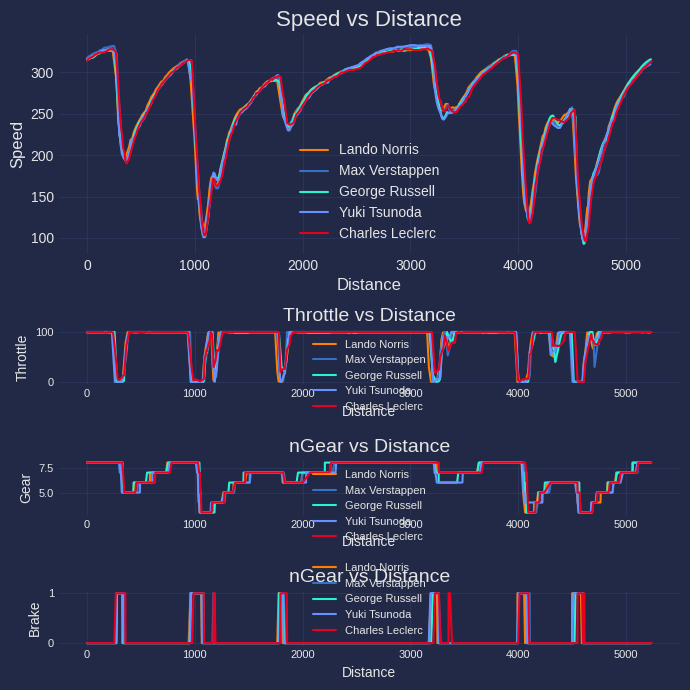

In [18]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = quali.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(4, 1, figsize=(7, 7), gridspec_kw={"height_ratios": [4, 1, 1, 1]})

ax[0].plot(
    tele_nor_quali.Distance, tele_nor_quali.Speed, label="Lando Norris", color=get_driver_color("NOR")
)
ax[0].plot(
    tele_ver_quali.Distance, tele_ver_quali.Speed, label="Max Verstappen", color=get_driver_color("VER")
)
ax[0].plot(
    tele_rus_quali.Distance, tele_rus_quali.Speed, label="George Russell", color=get_driver_color("RUS")
)
ax[0].plot(
    tele_tsu_quali.Distance, tele_tsu_quali.Speed, label="Yuki Tsunoda", color=get_driver_color("TSU")
)
ax[0].plot(
    tele_lec_quali.Distance, tele_lec_quali.Speed, label="Charles Leclerc", color=get_driver_color("LEC")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)
ax[1].plot(
    tele_nor_quali.Distance, tele_nor_quali.Throttle, label="Lando Norris", color=get_driver_color("NOR")
)
ax[1].plot(
    tele_ver_quali.Distance, tele_ver_quali.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)
ax[1].plot(
    tele_rus_quali.Distance, tele_rus_quali.Throttle, label="George Russell", color=get_driver_color("RUS")
)
ax[1].plot(
    tele_tsu_quali.Distance, tele_tsu_quali.Throttle, label="Yuki Tsunoda", color=get_driver_color("TSU")
)
ax[1].plot(
    tele_lec_quali.Distance, tele_lec_quali.Throttle, label="Charles Leclerc", color=get_driver_color("LEC")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)
ax[2].plot(
    tele_nor_quali.Distance, tele_nor_quali.nGear, label="Lando Norris", color=get_driver_color("NOR")
)
ax[2].plot(
    tele_ver_quali.Distance, tele_ver_quali.nGear, label="Max Verstappen", color=get_driver_color("VER")
)
ax[2].plot(
    tele_rus_quali.Distance, tele_rus_quali.nGear, label="George Russell", color=get_driver_color("RUS")
)
ax[2].plot(
    tele_tsu_quali.Distance, tele_tsu_quali.nGear, label="Yuki Tsunoda", color=get_driver_color("TSU")
)
ax[2].plot(
    tele_lec_quali.Distance, tele_lec_quali.nGear, label="Charles Leclerc", color=get_driver_color("LEC")
)

ax[2].set_title("nGear vs Distance", fontsize=14)
ax[2].set_xlabel("Distance", fontsize=10)
ax[2].set_ylabel("Gear", fontsize=10)
ax[2].legend(fontsize=8)
ax[2].grid(True)
ax[2].tick_params(axis="both", which="major", labelsize=8)
ax[3].plot(
    tele_nor_quali.Distance, tele_nor_quali.Brake, label="Lando Norris", color=get_driver_color("NOR")
)
ax[3].plot(
    tele_ver_quali.Distance, tele_ver_quali.Brake, label="Max Verstappen", color=get_driver_color("VER")
)
ax[3].plot(
    tele_rus_quali.Distance, tele_rus_quali.Brake, label="George Russell", color=get_driver_color("RUS")
)
ax[3].plot(
    tele_tsu_quali.Distance, tele_tsu_quali.Brake, label="Yuki Tsunoda", color=get_driver_color("TSU")
)
ax[3].plot(
    tele_lec_quali.Distance, tele_lec_quali.Brake, label="Charles Leclerc", color=get_driver_color("LEC")
)

ax[3].set_title("nGear vs Distance", fontsize=14)
ax[3].set_xlabel("Distance", fontsize=10)
ax[3].set_ylabel("Brake", fontsize=10)
ax[3].legend(fontsize=8)
ax[3].grid(True)
ax[3].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


In [19]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Lando Norris"] * len(nor_quali_sec1),
        "Sector1Time": nor_quali_sec1,
        "Sector2Time": nor_quali_sec2,
        "Sector3Time": nor_quali_sec3,
        "Lap Time": nor_quali_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_quali_sec1),
        "Sector1Time": ver_quali_sec1,
        "Sector2Time": ver_quali_sec2,
        "Sector3Time": ver_quali_sec3,
        "Lap Time": ver_quali_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_quali_sec1),
        "Sector1Time": rus_quali_sec1,
        "Sector2Time": rus_quali_sec2,
        "Sector3Time": rus_quali_sec3,
        "Lap Time": rus_quali_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Yuki Tsunoda"] * len(tsu_quali_sec1),
        "Sector1Time": tsu_quali_sec1,
        "Sector2Time": tsu_quali_sec2,
        "Sector3Time": tsu_quali_sec3,
        "Lap Time": tsu_quali_lap_time,
    }
)


driver5_sectors = pd.DataFrame(
    {
         "Driver": ["Charles Leclerc"] * len(lec_quali_sec1),
        "Sector1Time": lec_quali_sec1,
        "Sector2Time": lec_quali_sec2,
        "Sector3Time": lec_quali_sec3,
        "Lap Time": lec_quali_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors, driver5_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
0,Lando Norris,0 days 00:00:48.877000,0 days 00:00:24.492000,0 days 00:00:37.052000,0 days 00:01:50.421000
1,Lando Norris,0 days 00:00:26.383000,0 days 00:00:17.285000,0 days 00:00:32.335000,0 days 00:01:16.003000
2,Lando Norris,0 days 00:00:37.180000,0 days 00:00:23.115000,0 days 00:01:02.055000,0 days 00:02:02.350000
3,Lando Norris,0 days 00:00:52.032000,0 days 00:00:23.199000,0 days 00:00:41.029000,0 days 00:01:56.260000
4,Lando Norris,0 days 00:00:26.463000,0 days 00:00:17.116000,0 days 00:00:32.333000,0 days 00:01:15.912000
...,...,...,...,...,...
85,Charles Leclerc,0 days 00:00:26.184000,0 days 00:00:17.155000,0 days 00:00:32.488000,0 days 00:01:15.827000
87,Charles Leclerc,0 days 00:00:45.637000,0 days 00:00:20.511000,0 days 00:00:43.058000,0 days 00:01:49.206000
89,Charles Leclerc,0 days 00:00:52.054000,0 days 00:00:19.065000,0 days 00:00:43.099000,0 days 00:01:54.218000
90,Charles Leclerc,0 days 00:00:26.194000,0 days 00:00:17.025000,0 days 00:00:32.536000,0 days 00:01:15.755000


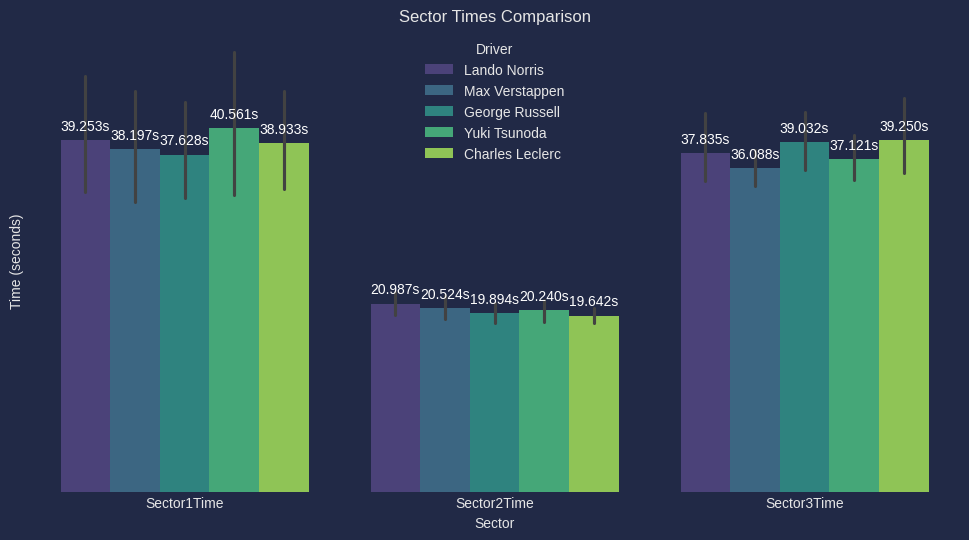

In [20]:
melted_data = all_drivers_sectors.melt(
    id_vars=["Driver"],
    value_vars=["Sector1Time", "Sector2Time", "Sector3Time"],
    var_name="Sector",
    value_name="Time",
)

melted_data["Time"] = melted_data["Time"].dt.total_seconds()

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(
    data=melted_data, x="Sector", y="Time", hue="Driver", palette="viridis"
)

for p in bar_plot.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        bar_plot.annotate(
            f"{height:.3f}s",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
        va="bottom",
            fontsize=10,
            color="white",
            xytext=(0, 5),
            textcoords="offset points",
        )

plt.title("Sector Times Comparison")
plt.ylabel("Time (seconds)")
plt.xlabel("Sector")
plt.gca().set_yticks([])
plt.show()

*Race*

In [21]:
race = f1.get_session(2025, "Australia", "R")
race.load()

core           INFO 	Loading data for Australian Grand Prix - Race [v3.5.3]


req            INFO 	Using cached data for session_info


req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data


req            INFO 	Using cached data for lap_count


req            INFO 	Using cached data for track_status_data


req            INFO 	Using cached data for _extended_timing_data


req            INFO 	Using cached data for timing_app_data


core           INFO 	Processing timing data...


req            INFO 	Using cached data for car_data


req            INFO 	Using cached data for position_data


req            INFO 	Using cached data for weather_data


req            INFO 	Using cached data for race_control_messages


core        WARNING 	Driver 4 completed the race distance 00:00.022000 before the recorded end of the session.


core           INFO 	Finished loading data for 20 drivers: ['4', '1', '63', '12', '23', '18', '27', '16', '81', '44', '10', '22', '31', '87', '30', '5', '14', '55', '7', '6']


In [22]:
race.session_info

{'Meeting': {'Key': 1254,
  'Name': 'Australian Grand Prix',
  'OfficialName': 'FORMULA 1 LOUIS VUITTON AUSTRALIAN GRAND PRIX 2025',
  'Location': 'Melbourne',
  'Number': 1,
  'Country': {'Key': 5, 'Code': 'AUS', 'Name': 'Australia'},
  'Circuit': {'Key': 10, 'ShortName': 'Melbourne'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 9693,
 'Type': 'Race',
 'Name': 'Race',
 'StartDate': datetime.datetime(2025, 3, 16, 15, 0),
 'EndDate': datetime.datetime(2025, 3, 16, 17, 0),
 'GmtOffset': datetime.timedelta(seconds=39600),
 'Path': '2025/2025-03-16_Australian_Grand_Prix/2025-03-16_Race/'}

In [23]:
race.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
4,NOR,McLaren,1.0,1.0,0 days 01:42:06.304000,Finished
1,VER,Red Bull Racing,3.0,2.0,0 days 00:00:00.895000,Finished
63,RUS,Mercedes,4.0,3.0,0 days 00:00:08.481000,Finished
12,ANT,Mercedes,16.0,4.0,0 days 00:00:10.135000,Finished
23,ALB,Williams,6.0,5.0,0 days 00:00:12.773000,Finished
18,STR,Aston Martin,13.0,6.0,0 days 00:00:17.413000,Finished
27,HUL,Kick Sauber,17.0,7.0,0 days 00:00:18.423000,Finished
16,LEC,Ferrari,7.0,8.0,0 days 00:00:19.826000,Finished
81,PIA,McLaren,2.0,9.0,0 days 00:00:20.448000,Finished
44,HAM,Ferrari,8.0,10.0,0 days 00:00:22.473000,Finished


In [24]:
race_laps = race.laps
race_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:13:00.002000,VER,1,0 days 00:01:59.392000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:20.705000,...,True,Red Bull Racing,0 days 01:11:00.355000,2025-03-16 04:18:22.974,124,5.0,False,,False,False
1,0 days 01:15:49.358000,VER,1,NaT,2.0,1.0,NaT,0 days 01:15:38.205000,0 days 00:00:58.141000,0 days 00:00:37.976000,...,True,Red Bull Racing,0 days 01:13:00.002000,2025-03-16 04:20:22.621,4,2.0,False,,False,False
2,0 days 01:18:31.526000,VER,1,NaT,3.0,2.0,0 days 01:15:51.658000,0 days 01:18:20.223000,0 days 00:00:56.230000,0 days 00:00:33.683000,...,False,Red Bull Racing,0 days 01:15:49.358000,2025-03-16 04:23:11.977,4,2.0,False,,False,False
3,0 days 01:21:07.226000,VER,1,NaT,4.0,3.0,0 days 01:18:34.029000,0 days 01:20:56.543000,0 days 00:00:54.351000,0 days 00:00:32.712000,...,False,Red Bull Racing,0 days 01:18:31.526000,2025-03-16 04:25:54.145,4,2.0,False,,False,False
4,0 days 01:23:30.835000,VER,1,0 days 00:02:23.609000,5.0,4.0,0 days 01:21:09.534000,NaT,0 days 00:00:53.513000,0 days 00:00:32.627000,...,False,Red Bull Racing,0 days 01:21:07.226000,2025-03-16 04:28:29.845,4,2.0,False,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,0 days 02:47:44.697000,BEA,87,0 days 00:01:31.366000,53.0,7.0,NaT,NaT,0 days 00:00:31.993000,0 days 00:00:19.286000,...,True,Haas F1 Team,0 days 02:46:13.331000,2025-03-16 05:53:35.950,1,14.0,False,,False,True
923,0 days 02:49:15.187000,BEA,87,0 days 00:01:30.490000,54.0,7.0,NaT,NaT,0 days 00:00:31.429000,0 days 00:00:19.147000,...,True,Haas F1 Team,0 days 02:47:44.697000,2025-03-16 05:55:07.316,1,14.0,False,,False,True
924,0 days 02:50:46.471000,BEA,87,0 days 00:01:31.284000,55.0,7.0,NaT,NaT,0 days 00:00:31.538000,0 days 00:00:19.483000,...,True,Haas F1 Team,0 days 02:49:15.187000,2025-03-16 05:56:37.806,1,14.0,False,,False,True
925,0 days 02:52:16.697000,BEA,87,0 days 00:01:30.226000,56.0,7.0,NaT,NaT,0 days 00:00:31.349000,0 days 00:00:19.207000,...,True,Haas F1 Team,0 days 02:50:46.471000,2025-03-16 05:58:09.090,1,14.0,False,,False,True


In [25]:
nor_race_laps = race.laps.pick_driver("NOR")
fastest_lap_nor_race = nor_race_laps.pick_fastest().LapTime
nor_race_lap_time = nor_race_laps["LapTime"]
nor_race_sec1 = nor_race_laps["Sector1Time"]
nor_race_sec2 = nor_race_laps["Sector2Time"]
nor_race_sec3 = nor_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_nor_race), "which was in Lap number" ,nor_race_laps.pick_fastest().LapNumber)
nor_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:22.167000 which was in Lap number 43.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
593,0 days 00:01:57.099000,NaT,0 days 00:00:20.913000,0 days 00:00:54.007000,242.0,284.0,269.0,227.0
594,NaT,0 days 00:00:58.907000,0 days 00:00:38.076000,0 days 00:01:12.905000,68.0,223.0,NaN,242.0
595,NaT,0 days 00:00:56.498000,0 days 00:00:34.215000,0 days 00:01:11.010000,84.0,149.0,NaN,184.0
596,NaT,0 days 00:00:55.356000,0 days 00:00:32.664000,0 days 00:01:08.033000,83.0,239.0,NaN,188.0
597,0 days 00:02:23.648000,0 days 00:00:53.992000,0 days 00:00:31.669000,0 days 00:00:57.987000,89.0,144.0,260.0,186.0


In [26]:
fastest_lap_nor_race = nor_race_laps.pick_fastest()
tele_nor_race = fastest_lap_nor_race.get_telemetry().add_distance()
speed_nor_race = tele_nor_race.Speed
tele_nor_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,292.271429,7,11682.442865
3,292.521429,7,11684.692861
4,293.000000,7,11689.000000
5,294.050001,7,11717.875029
6,295.000000,7,11744.000000
...,...,...,...
628,291.000000,7,11602.000000
629,292.383334,7,11651.108371
630,293.000000,7,11673.000000
631,293.607144,7,11301.124160


In [27]:
ver_race_laps = race.laps.pick_driver("VER")
fastest_lap_ver_race = ver_race_laps.pick_fastest().LapTime
ver_race_lap_time = ver_race_laps["LapTime"]
ver_race_sec1 = ver_race_laps["Sector1Time"]
ver_race_sec2 = ver_race_laps["Sector2Time"]
ver_race_sec3 = ver_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_race), "which was in Lap number" ,ver_race_laps.pick_fastest().LapNumber)
ver_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:23.081000 which was in Lap number 43.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,0 days 00:01:59.392000,NaT,0 days 00:00:20.705000,0 days 00:00:55.250000,249.0,292.0,247.0,215.0
1,NaT,0 days 00:00:58.141000,0 days 00:00:37.976000,0 days 00:01:13.205000,66.0,222.0,NaN,210.0
2,NaT,0 days 00:00:56.230000,0 days 00:00:33.683000,0 days 00:01:12.232000,78.0,203.0,NaN,180.0
3,NaT,0 days 00:00:54.351000,0 days 00:00:32.712000,0 days 00:01:08.712000,103.0,240.0,NaN,187.0
4,0 days 00:02:23.609000,0 days 00:00:53.513000,0 days 00:00:32.627000,0 days 00:00:57.469000,79.0,130.0,237.0,194.0


In [28]:
fastest_lap_ver_race = ver_race_laps.pick_fastest()
tele_ver_race = fastest_lap_ver_race.get_telemetry().add_distance()
speed_ver_race = tele_ver_race.Speed
tele_ver_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,294.118750,7,10876.018629
3,294.287501,7,10824.887258
4,295.000000,7,10609.000000
5,295.589286,7,10587.196403
6,296.000000,8,10572.000000
...,...,...,...
637,292.532711,7,11526.133967
638,294.000000,7,11577.000000
639,294.646925,7,11032.289373
640,294.783599,7,10917.209663


In [29]:
ant_race_laps = race.laps.pick_driver("ANT")
fastest_lap_ant_race = ant_race_laps.pick_fastest().LapTime
ant_race_lap_time = ant_race_laps["LapTime"]
ant_race_sec1 = ant_race_laps["Sector1Time"]
ant_race_sec2 = ant_race_laps["Sector2Time"]
ant_race_sec3 = ant_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ant_race), "which was in Lap number" ,ant_race_laps.pick_fastest().LapNumber)
ant_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:24.901000 which was in Lap number 43.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
114,0 days 00:02:22.352000,NaT,0 days 00:00:22.829000,0 days 00:01:09.366000,219.0,198.0,245.0,186.0
115,NaT,0 days 00:00:55.459000,0 days 00:00:32.481000,0 days 00:01:21.860000,78.0,167.0,NaN,145.0
116,NaT,0 days 00:00:51.498000,0 days 00:00:33.080000,0 days 00:01:20.177000,97.0,123.0,NaN,177.0
117,NaT,0 days 00:00:49.814000,0 days 00:00:32.851000,0 days 00:01:11.933000,81.0,156.0,NaN,196.0
118,0 days 00:02:19.163000,0 days 00:00:49.979000,0 days 00:00:30.052000,0 days 00:00:59.132000,125.0,274.0,193.0,187.0


In [30]:
fastest_lap_ant_race = ant_race_laps.pick_fastest()
tele_ant_race = fastest_lap_ant_race.get_telemetry().add_distance()
speed_ant_race = tele_ant_race.Speed
tele_ant_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,297.083332,8,10619.083307
3,297.708333,8,10634.708320
4,298.000000,8,10642.000000
5,299.374999,8,10683.937484
6,300.000000,8,10703.000000
...,...,...,...
648,304.776119,8,10954.343255
649,305.000000,8,10963.000000
650,309.000000,8,10987.000000
651,309.452261,8,11016.623102


In [31]:
lec_race_laps = race.laps.pick_driver("LEC")
fastest_lap_lec_race = lec_race_laps.pick_fastest().LapTime
lec_race_lap_time = lec_race_laps["LapTime"]
lec_race_sec1 = lec_race_laps["Sector1Time"]
lec_race_sec2 = lec_race_laps["Sector2Time"]
lec_race_sec3 = lec_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_lec_race), "which was in Lap number" ,lec_race_laps.pick_fastest().LapNumber)
lec_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:25.271000 which was in Lap number 43.0


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
204,0 days 00:02:08.480000,NaT,0 days 00:00:20.690000,0 days 00:01:02.574000,233.0,297.0,243.0,191.0
205,NaT,0 days 00:00:55.101000,0 days 00:00:36.092000,0 days 00:01:16.040000,67.0,200.0,NaN,218.0
206,NaT,0 days 00:00:54.771000,0 days 00:00:32.738000,0 days 00:01:14.652000,46.0,206.0,NaN,185.0
207,NaT,0 days 00:00:52.602000,0 days 00:00:32.053000,0 days 00:01:11.147000,98.0,260.0,NaN,150.0
208,0 days 00:02:22.597000,0 days 00:00:51.208000,0 days 00:00:31.916000,0 days 00:00:59.473000,99.0,259.0,223.0,197.0


In [32]:
fastest_lap_lec_race = lec_race_laps.pick_fastest()
tele_lec_race = fastest_lap_lec_race.get_telemetry().add_distance()
speed_lec_race = tele_lec_race.Speed
tele_lec_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,295.362501,8,10557.274998
3,295.781251,8,10556.437498
4,296.156251,8,10555.687498
5,297.000000,8,10554.000000
6,297.450002,8,10566.825055
...,...,...,...
656,308.000000,8,10918.000000
657,310.000000,8,11019.000000
658,310.400000,8,11040.600000
659,311.000000,8,11073.000000


In [33]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Lando Norris"] * len(nor_race_sec1),
        "Sector1Time": nor_race_sec1,
        "Sector2Time": nor_race_sec2,
        "Sector3Time": nor_race_sec3,
        "Lap Time": nor_race_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_race_sec1),
        "Sector1Time": ver_race_sec1,
        "Sector2Time": ver_race_sec2,
        "Sector3Time": ver_race_sec3,
        "Lap Time": ver_race_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Andrea Kimi Antonelli"] * len(ant_race_sec1),
        "Sector1Time": ant_race_sec1,
        "Sector2Time": ant_race_sec2,
        "Sector3Time": ant_race_sec3,
        "Lap Time": ant_race_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Charles Leclerc"] * len(lec_race_sec1),
        "Sector1Time": lec_race_sec1,
        "Sector2Time": lec_race_sec2,
        "Sector3Time": lec_race_sec3,
        "Lap Time": lec_race_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
4,Lando Norris,0 days 00:00:53.992000,0 days 00:00:31.669000,0 days 00:00:57.987000,0 days 00:02:23.648000
5,Lando Norris,0 days 00:00:48.236000,0 days 00:00:33.814000,0 days 00:00:58.373000,0 days 00:02:20.423000
6,Lando Norris,0 days 00:00:46.009000,0 days 00:00:30.022000,0 days 00:01:01.077000,0 days 00:02:17.108000
7,Lando Norris,0 days 00:00:34.845000,0 days 00:00:20.542000,0 days 00:00:40.891000,0 days 00:01:36.278000
8,Lando Norris,0 days 00:00:34.182000,0 days 00:00:19.932000,0 days 00:00:40.524000,0 days 00:01:34.638000
...,...,...,...,...,...
223,Charles Leclerc,0 days 00:00:32.685000,0 days 00:00:18.763000,0 days 00:00:41.283000,0 days 00:01:32.731000
224,Charles Leclerc,0 days 00:00:32.942000,0 days 00:00:18.901000,0 days 00:00:39.239000,0 days 00:01:31.082000
225,Charles Leclerc,0 days 00:00:31.892000,0 days 00:00:18.590000,0 days 00:00:39.493000,0 days 00:01:29.975000
226,Charles Leclerc,0 days 00:00:31.380000,0 days 00:00:18.561000,0 days 00:00:39.860000,0 days 00:01:29.801000


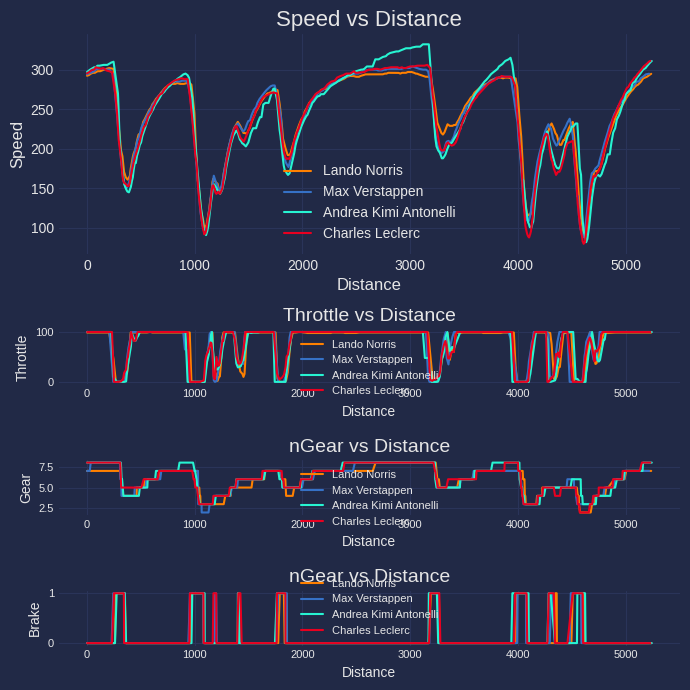

In [34]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = race.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(4, 1, figsize=(7, 7), gridspec_kw={"height_ratios": [4, 1, 1, 1]})

ax[0].plot(
    tele_nor_race.Distance, tele_nor_race.Speed, label="Lando Norris", color=get_driver_color("NOR")
)
ax[0].plot(
    tele_ver_race.Distance, tele_ver_race.Speed, label="Max Verstappen", color=get_driver_color("VER")
)
ax[0].plot(
    tele_ant_race.Distance, tele_ant_race.Speed, label="Andrea Kimi Antonelli", color=get_driver_color("ANT")
)
ax[0].plot(
    tele_lec_race.Distance, tele_lec_race.Speed, label="Charles Leclerc", color=get_driver_color("LEC")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)
ax[1].plot(
    tele_nor_race.Distance, tele_nor_race.Throttle, label="Lando Norris", color=get_driver_color("NOR")
)
ax[1].plot(
    tele_ver_race.Distance, tele_ver_race.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)
ax[1].plot(
    tele_ant_race.Distance, tele_ant_race.Throttle, label="Andrea Kimi Antonelli", color=get_driver_color("ANT")
)
ax[1].plot(
    tele_lec_race.Distance, tele_lec_race.Throttle, label="Charles Leclerc", color=get_driver_color("LEC")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)
ax[2].plot(
    tele_nor_race.Distance, tele_nor_race.nGear, label="Lando Norris", color=get_driver_color("NOR")
)
ax[2].plot(
    tele_ver_race.Distance, tele_ver_race.nGear, label="Max Verstappen", color=get_driver_color("VER")
)
ax[2].plot(
    tele_ant_race.Distance, tele_ant_race.nGear, label="Andrea Kimi Antonelli", color=get_driver_color("ANT")
)
ax[2].plot(
    tele_lec_race.Distance, tele_lec_race.nGear, label="Charles Leclerc", color=get_driver_color("LEC")
)

ax[2].set_title("nGear vs Distance", fontsize=14)
ax[2].set_xlabel("Distance", fontsize=10)
ax[2].set_ylabel("Gear", fontsize=10)
ax[2].legend(fontsize=8)
ax[2].grid(True)
ax[2].tick_params(axis="both", which="major", labelsize=8)
ax[3].plot(
    tele_nor_race.Distance, tele_nor_race.Brake, label="Lando Norris", color=get_driver_color("NOR")
)
ax[3].plot(
    tele_ver_race.Distance, tele_ver_race.Brake, label="Max Verstappen", color=get_driver_color("VER")
)
ax[3].plot(
    tele_ant_race.Distance, tele_ant_race.Brake, label="Andrea Kimi Antonelli", color=get_driver_color("ANT")
)
ax[3].plot(
    tele_lec_race.Distance, tele_lec_race.Brake, label="Charles Leclerc", color=get_driver_color("LEC")
)

ax[3].set_title("nGear vs Distance", fontsize=14)
ax[3].set_xlabel("Distance", fontsize=10)
ax[3].set_ylabel("Brake", fontsize=10)
ax[3].legend(fontsize=8)
ax[3].grid(True)
ax[3].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


In [35]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Lando Norris"] * len(nor_race_sec1),
        "Sector1Time": nor_race_sec1,
        "Sector2Time": nor_race_sec2,
        "Sector3Time": nor_race_sec3,
        "Lap Time": nor_race_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_race_sec1),
        "Sector1Time": ver_race_sec1,
        "Sector2Time": ver_race_sec2,
        "Sector3Time": ver_race_sec3,
        "Lap Time": ver_race_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Andrea Kimi Antonelli"] * len(ant_race_sec1),
        "Sector1Time": ant_race_sec1,
        "Sector2Time": ant_race_sec2,
        "Sector3Time": ant_race_sec3,
        "Lap Time": ant_race_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Charles Leclerc"] * len(lec_race_sec1),
        "Sector1Time": lec_race_sec1,
        "Sector2Time": lec_race_sec2,
        "Sector3Time": lec_race_sec3,
        "Lap Time": lec_race_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
4,Lando Norris,0 days 00:00:53.992000,0 days 00:00:31.669000,0 days 00:00:57.987000,0 days 00:02:23.648000
5,Lando Norris,0 days 00:00:48.236000,0 days 00:00:33.814000,0 days 00:00:58.373000,0 days 00:02:20.423000
6,Lando Norris,0 days 00:00:46.009000,0 days 00:00:30.022000,0 days 00:01:01.077000,0 days 00:02:17.108000
7,Lando Norris,0 days 00:00:34.845000,0 days 00:00:20.542000,0 days 00:00:40.891000,0 days 00:01:36.278000
8,Lando Norris,0 days 00:00:34.182000,0 days 00:00:19.932000,0 days 00:00:40.524000,0 days 00:01:34.638000
...,...,...,...,...,...
223,Charles Leclerc,0 days 00:00:32.685000,0 days 00:00:18.763000,0 days 00:00:41.283000,0 days 00:01:32.731000
224,Charles Leclerc,0 days 00:00:32.942000,0 days 00:00:18.901000,0 days 00:00:39.239000,0 days 00:01:31.082000
225,Charles Leclerc,0 days 00:00:31.892000,0 days 00:00:18.590000,0 days 00:00:39.493000,0 days 00:01:29.975000
226,Charles Leclerc,0 days 00:00:31.380000,0 days 00:00:18.561000,0 days 00:00:39.860000,0 days 00:01:29.801000


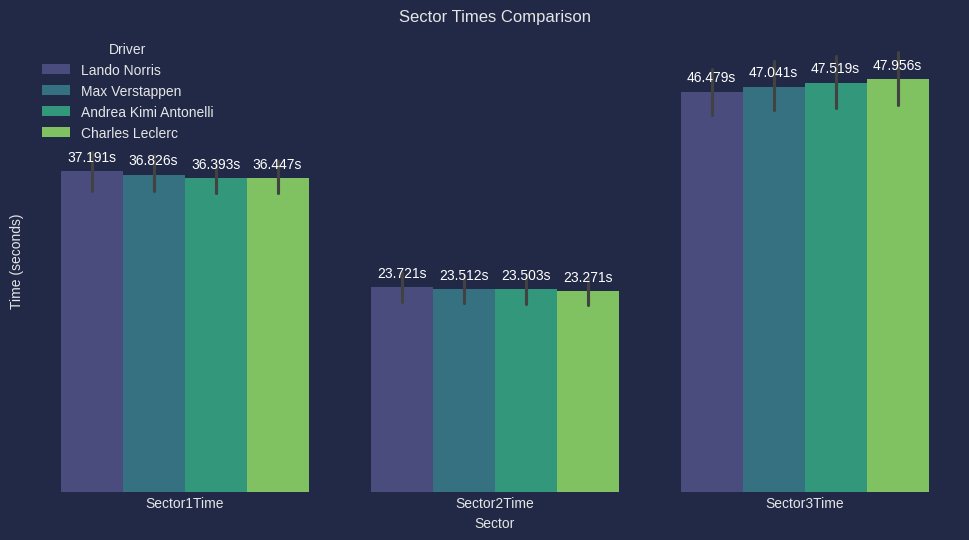

In [36]:
melted_data = all_drivers_sectors.melt(
    id_vars=["Driver"],
    value_vars=["Sector1Time", "Sector2Time", "Sector3Time"],
    var_name="Sector",
    value_name="Time",
)

melted_data["Time"] = melted_data["Time"].dt.total_seconds()

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(
    data=melted_data, x="Sector", y="Time", hue="Driver", palette="viridis"
)

for p in bar_plot.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        bar_plot.annotate(
            f"{height:.3f}s",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
        va="bottom",
            fontsize=10,
            color="white",
            xytext=(0, 5),
            textcoords="offset points",
        )

plt.title("Sector Times Comparison")
plt.ylabel("Time (seconds)")
plt.xlabel("Sector")
plt.gca().set_yticks([])
plt.show()

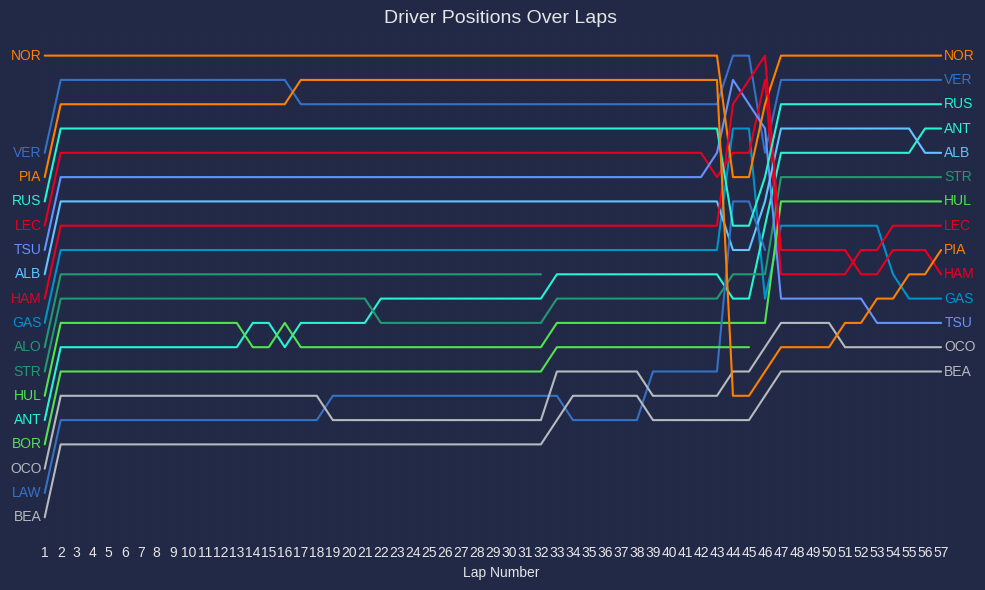

In [37]:
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
nlaps = int(race.laps.LapNumber.unique().max())

team_colors = {}

for driver in drivers_ab:
    driver_object = race.get_driver(driver)
    hex_color = driver_object.TeamColor
    team_colors[driver] = hex_to_rgb(hex_color)

plt.figure(figsize=(10, 6))
for driver in drivers_ab:
    positions = race_laps[race_laps['Driver'] == driver]['Position'].values  
    color = team_colors.get(driver, (0.5, 0.5, 0.5))
    plt.plot(range(1, len(positions) + 1), positions, label=driver, color=color)
    
    plt.text(
        1 - 0.2,
        positions[0],
        driver,
        color=color,
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='right'
    )
    
    plt.text(
        len(positions) + 0.2,
        positions[-1],
        driver,
        color=color,
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='left'
    )

plt.title("Driver Positions Over Laps", fontsize=14)
plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim(0.5, float(nlaps) + 1.5)
plt.xlabel("Lap Number")
plt.ylim(0, 21)
plt.gca().invert_yaxis()
plt.gca().set_yticks([])
plt.xticks(range(1, nlaps + 1))
plt.tight_layout()
plt.show()

/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.wa

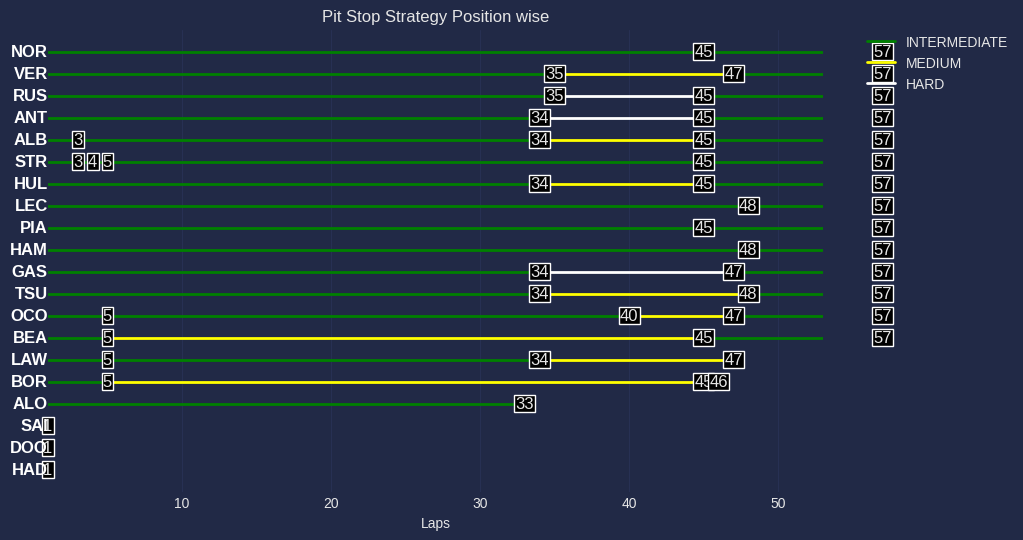

In [38]:
def getDriverPosition(abbreviation: str):
    res = race.results
    abbr = res["Abbreviation"] == abbreviation
    pos = res.loc[abbr, ["Position"]]
    posi = pos.iloc[-1]
    return int(posi.iloc[0])


def getCompound(abbreviation: str):
    driver_race = race.laps.pick_driver(abbreviation)
    lastLap = driver_race.LapNumber.count()
    if driver_race["TyreLife"].iloc[0] == 1.0:
        condition = driver_race["TyreLife"] == 1
        driver_comp = driver_race.loc[condition, ["Compound", "LapNumber"]]
        compound = driver_comp.Compound.tolist()
        return compound, driver_comp, lastLap
    else:
        compound = []
        result = []
        for i in range(0, len(driver_race["TyreLife"])):
            if driver_race["TyreLife"].iloc[i] < driver_race["TyreLife"].iloc[i - 1]:
                result.append(
                    {
                        "Compound": driver_race["Compound"].iloc[i],
                        "LapNumber": driver_race["LapNumber"].iloc[i],
                    }
                )
                compound.append(driver_race["Compound"].iloc[i])

        driver_comp = pd.DataFrame(result)
        return compound, driver_comp, lastLap


fig, ax = plt.subplots(figsize=(10, 6))

color_mapping = {
    "MEDIUM": "yellow",
    "SOFT": "red",
    "HARD": "white",
    "INTERMEDIATE": "green",
    "WET": "blue",
}
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
used_labels = set()
for driver in drivers_ab:
    compound, driver_comp, lastLap = getCompound(driver)

    list1 = driver_comp.LapNumber.tolist()
    list1.append(lastLap)
    int_list = [int(x) for x in list1]
    x_points = int_list
    n = len(int_list)
    posi = getDriverPosition(driver)
    y_points = [posi] * n

    for i in range(len(driver_comp.LapNumber)):
        x_segment = [x_points[i], x_points[i + 1]]
        y_segment = [y_points[i], y_points[i + 1]]
        tire_color = color_mapping.get(compound[i], "#000000")
        label = compound[i] if compound[i] not in used_labels else None
        
        ax.plot(x_segment, y_segment, color=tire_color, linewidth=2, label=label)
        used_labels.add(compound[i])

        ax.text(
            x_points[i + 1],
            y_points[i + 1],
            str(x_points[i + 1]),
            fontsize=12,
            ha="center",
            va="center",
            bbox=dict(facecolor="black", edgecolor="white", pad=1),
        )
        ax.annotate(f'{i}',
                xy=(0, 1),
                xytext=(-10, 0),
                textcoords='offset points',
                va='center',
                ha='right',
                color="white",
                fontweight='bold')
    ax.text(
        x_points[0], 
        y_points[0], 
        driver, 
        fontsize=12, 
        ha='right', 
        va='center', 
        color="white", 
        fontweight='bold',
    )
    
ax.set_xlim(1, 53)
ax.invert_yaxis()
ax.set_ylim(21, 0)
ax.set_title("Pit Stop Strategy Position wise")
ax.set_xlabel("Laps")
plt.gca().set_yticks([])
ax.axvline(x=0, color='black', linewidth=2)
ax.grid(True, linestyle="-", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.show()

In [39]:
res = race.results
drivers = res['Abbreviation'].tolist()
fastest_speed = pd.DataFrame(columns=['Driver', 'Speed'])
for i in drivers:
    tele = race.laps.pick_driver(i)
    speed = tele.SpeedST.max()
    df = pd.DataFrame({'Driver': [i], 'Speed': [speed]})
    fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)
fastest_speed.sort_values(by="Speed",ascending=True)


/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/tmp/ipykernel_26609/905247657.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)


,Driver,Speed
13,BEA,290.0
4,ALB,291.0
12,OCO,292.0
7,LEC,295.0
15,BOR,295.0
10,GAS,296.0
6,HUL,296.0
16,ALO,296.0
1,VER,298.0
3,ANT,299.0


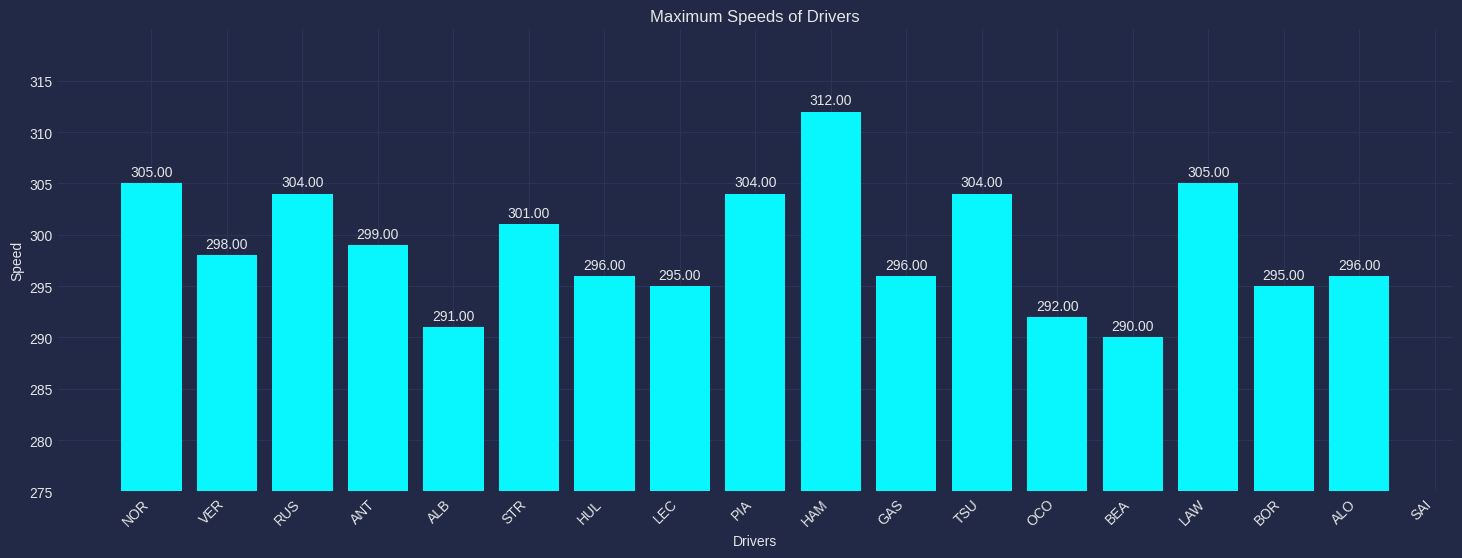

In [40]:
fig,ax = plt.subplots(figsize=(18, 6))
bars = ax.bar(fastest_speed['Driver'], fastest_speed['Speed'])
ax.set_xlabel('Drivers')
ax.set_ylabel('Speed')
ax.set_title('Maximum Speeds of Drivers')
plt.xticks(rotation=45, ha='right')

y_min = 275
y_max = np.ceil(fastest_speed['Speed'].max() / 5) * 5 + 5
y_ticks = np.arange(y_min, y_max, 5)
ax.set_ylim(y_min, y_max)
ax.set_yticks(y_ticks)

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

*Pace Comparison*

In [41]:
plotting.setup_mpl()

/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


In [42]:
laps_ver = race_laps.pick_driver("VER")
laps_nor = race_laps.pick_driver("NOR")

fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()
fastest_nor = laps_nor.pick_fastest().get_telemetry().add_distance()

fastest_ver["Driver"] = "VER"
fastest_nor["Driver"] = "NOR"
telemetry = pd.concat([fastest_ver,fastest_nor])

/home/hexa/Coding/F1-data-analysis/venv/lib/python3.10/site-packages/fastf1/core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [43]:
num_minisectors = 25
total_distance = total_distance = max(telemetry['Distance'])
minisector_length = total_distance / num_minisectors
minisectors = [0]
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [44]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
average_speed

,Minisector,Driver,Speed
0,1,NOR,297.287338
1,1,VER,298.669825
2,2,NOR,208.338981
3,2,VER,195.635422
4,3,NOR,225.570441
5,3,VER,226.301716
6,4,NOR,275.703895
7,4,VER,273.874564
8,5,NOR,246.954675
9,5,VER,247.685066


In [45]:
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})


In [46]:
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

telemetry = telemetry.sort_values(by=['Distance'])

telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'NOR', 'Fastest_driver_int'] = 2

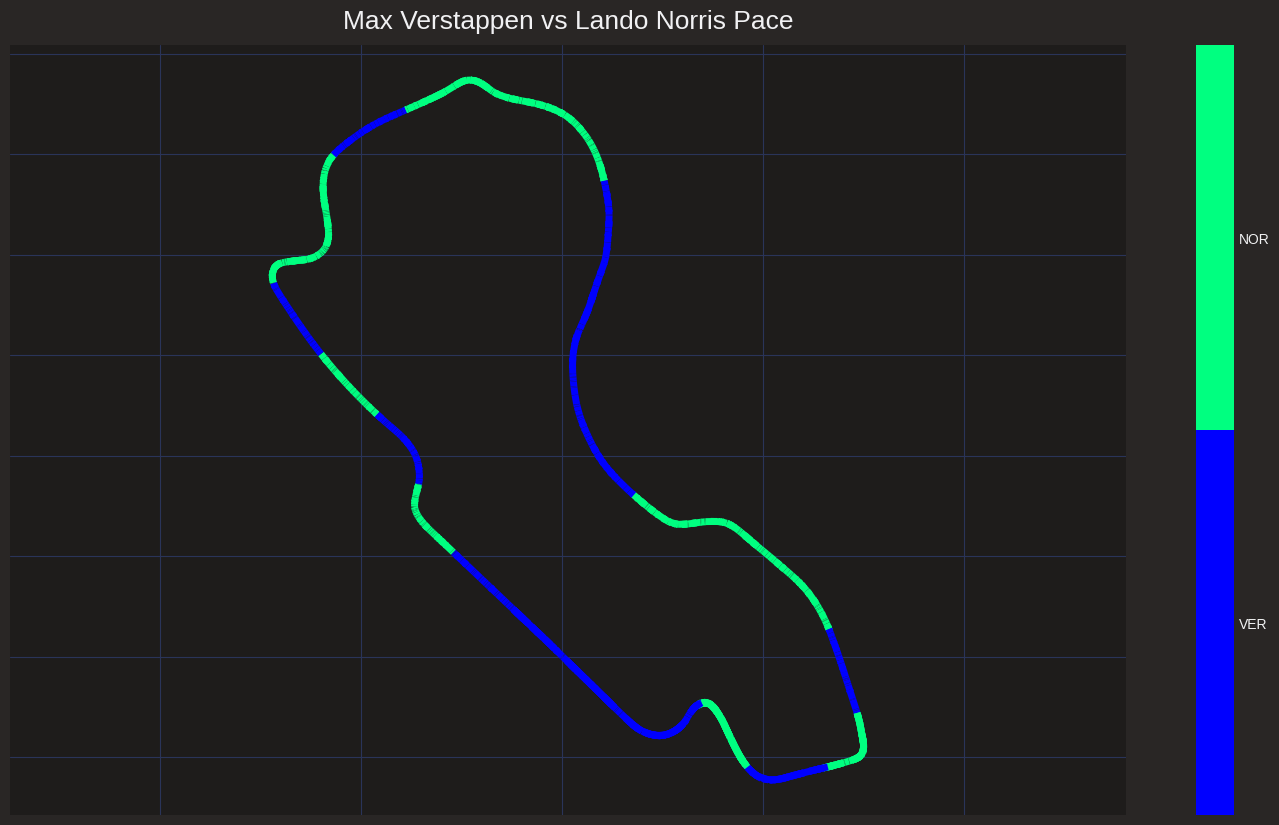

In [47]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = plt.get_cmap('winter', 2)  # Create a colormap with 2 colors
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

cbar = plt.colorbar(mappable=lc_comp, boundaries=[1, 2, 3])
cbar.set_ticks([1.5, 2.5])
cbar.set_ticklabels(['VER', 'NOR'])
plt.title("Max Verstappen vs Lando Norris Pace")
plt.show()
